In [37]:
import pandas as pd
import matplotlib.pyplot as plt

In [38]:
import numpy as np

In [39]:
df_can=pd.read_excel("https://bit.ly/32HXvZB",sheet_name='Canada by Citizenship', skiprows=range(20), skipfooter=2)
df_can.head()
print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


In [40]:
df_can.drop(['AREA','REG','DEV','Type','Coverage'], axis=1, inplace=True)
df_can.head()

,OdName,AreaName,RegName,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,1


In [41]:
df_can.rename(columns={'OdName':'Country','AreaName':'Continent','RegName':'Region'}, inplace=True)
df_can.head()

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,1


In [42]:
df_can.columns = list(map(str, df_can.columns))

In [43]:
df_can.set_index('Country', inplace=True)

In [44]:
df_can['Total'] = df_can.sum(axis=1)

C:\Users\admin\AppData\Local\Temp\ipykernel_26220\552165185.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_can['Total'] = df_can.sum(axis=1)


In [45]:
years = list(map(str, range(1980, 2014)))
print('data dimensions:', df_can.shape)

data dimensions: (195, 38)


In [46]:
get_ipython().run_line_magic('matplotlib', 'inline')

import matplotlib as mpl
import matplotlib.pyplot as plt

## 1) Pie chart

A pie chart to explore the proportion (percentage) of new immigrants
grouped by continents for the entire time period from 1980 to 2013

In [47]:
df_continents = df_can.groupby('Continent', axis=0).sum()

print(type(df_can.groupby('Continent', axis=0)))

df_continents.head()

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Continent,,,,,,,,,,,,,,,,,,,,,
Africa,3951,4363,3819,2671,2639,2650,3782,7494,7552,9894,...,27523,29188,28284,29890,34534,40892,35441,38083,38543,618948
Asia,31025,34314,30214,24696,27274,23850,28739,43203,47454,60256,...,159253,149054,133459,139894,141434,163845,146894,152218,155075,3317794
Europe,39760,44802,42720,24638,22287,20844,24370,46698,54726,60893,...,35955,33053,33495,34692,35078,33425,26778,29177,28691,1410947
Latin America and the Caribbean,13081,15215,16769,15427,13678,15171,21179,28471,21924,25060,...,24747,24676,26011,26547,26867,28818,27856,27173,24950,765148
Northern America,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790,...,8394,9613,9463,10190,8995,8142,7677,7892,8503,241142


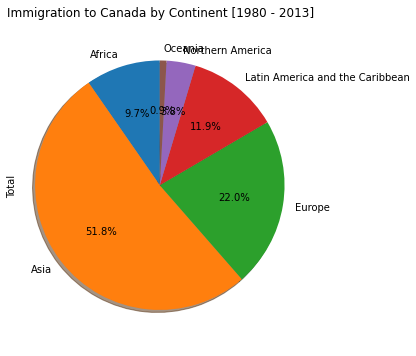

In [48]:
df_continents['Total'].plot(kind='pie',
                            figsize=(5, 6),
                            autopct='%1.1f%%', # add in percentages
                            startangle=90,     # start angle 90° (Africa)
                            shadow=True,       # add shadow      
                            )

plt.title('Immigration to Canada by Continent [1980 - 2013]')
plt.axis('equal') # Sets the pie chart to look like a circle.

plt.show()


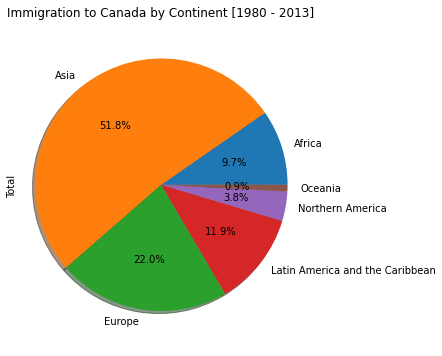

In [49]:
df_continents['Total'].plot(kind='pie',
                            figsize=(5, 6),
                            autopct='%1.1f%%',
                            shadow=True,
                           )

plt.title('Immigration to Canada by Continent [1980 - 2013]')
plt.axis('equal') 
plt.show()

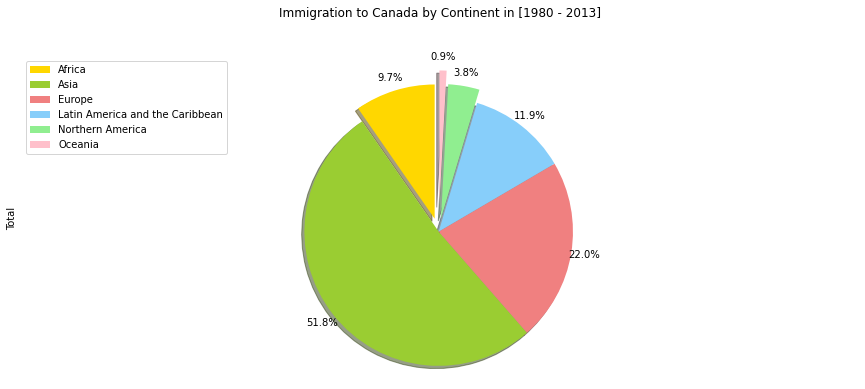

In [50]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explode_list = [0.1, 0, 0, 0, 0.1, 0.2] # ratio for each continent with which to offset each wedge.
df_continents['Total'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         
                            pctdistance=1.1,    
                            colors=colors_list, 
                            explode=explode_list 
                            )

plt.title('Immigration to Canada by Continent in [1980 - 2013]', y=1.1) 
plt.axis('equal')
plt.legend(labels=df_continents.index, loc='upper left')

plt.show()


# Question - Pie chart
Using a pie chart, explore the proportion (percentage) of new immigrants
grouped by continents in the year 2013.
Note: You might need to play with the explore values in order to fix any overlapping
slice values.

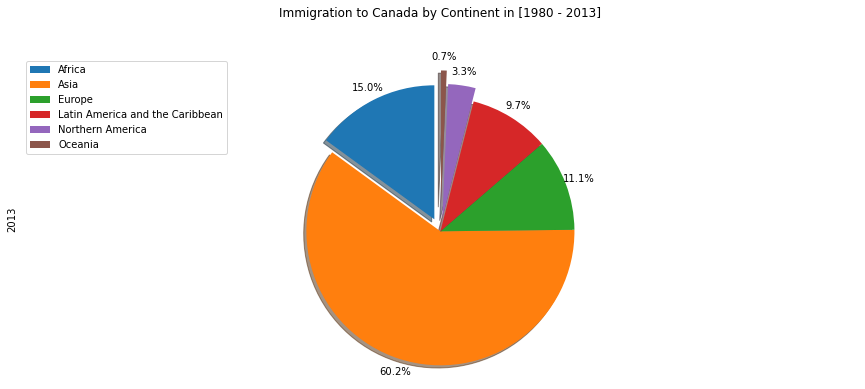

In [51]:
explode_list = [0.1, 0, 0, 0, 0.1, 0.2] # ratio for each continent with which to offset each wedge.
df_continents['2013'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         
                            pctdistance=1.1,  
                            explode=explode_list 
                            )

plt.title('Immigration to Canada by Continent in [1980 - 2013]', y=1.1) 
plt.axis('equal')
plt.legend(labels=df_continents.index, loc='upper left')

plt.show()


# 2) Box Plots:

In [52]:
df_japan = df_can.loc[['Japan'], years].transpose()
df_japan.head()

Country,Japan
1980,701
1981,756
1982,598
1983,309
1984,246


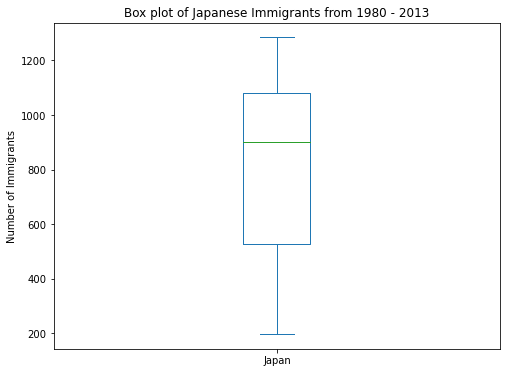

In [53]:
df_japan.plot(kind='box', figsize=(8, 6))

plt.title('Box plot of Japanese Immigrants from 1980 - 2013')
plt.ylabel('Number of Immigrants')

plt.show()

In [54]:
df_japan.describe()

Country,Japan
count,34.000000
mean,814.911765
std,337.219771
min,198.000000
25%,529.000000
50%,902.000000
75%,1079.000000
max,1284.000000


# Question - Box Plot

Compare the distribution of the number of new immigrants from India and China for the period 1980 - 2013.

In [55]:
df_CI = df_can.loc[['India','China'], years].transpose()
df_CI.head()

Country,India,China
1980,8880,5123
1981,8670,6682
1982,8147,3308
1983,7338,1863
1984,5704,1527


In [56]:
df_CI.describe()

Country,India,China
count,34.000000,34.000000
mean,20350.117647,19410.647059
std,10007.342579,13568.230790
min,4211.000000,1527.000000
25%,10637.750000,5512.750000
50%,20235.000000,19945.000000
75%,28699.500000,31568.500000
max,36210.000000,42584.000000


### 1. box plots

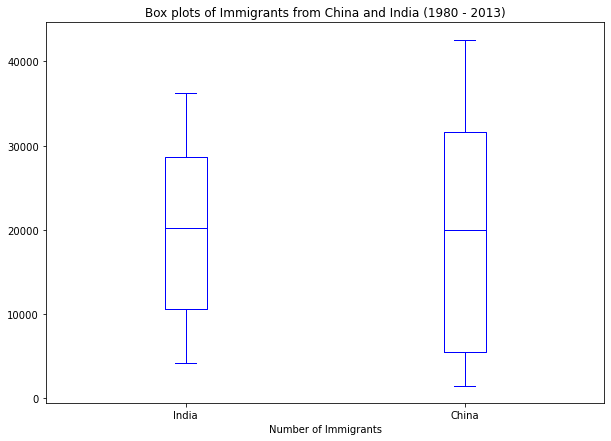

In [57]:
df_CI.plot(kind='box', figsize=(10, 7), color='blue') 

plt.title('Box plots of Immigrants from China and India (1980 - 2013)')
plt.xlabel('Number of Immigrants')

plt.show()

### 2. horizontal box plots

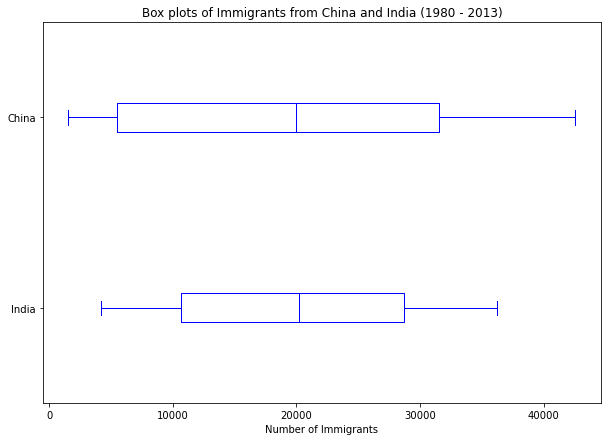

In [58]:
df_CI.plot(kind='box', figsize=(10, 7), color='blue', vert=False) 

plt.title('Box plots of Immigrants from China and India (1980 - 2013)')
plt.xlabel('Number of Immigrants')

plt.show()

# 3) Subplots: 
To visualize multiple plots together, we can create a figure (overall canvas) and divide it into subplots, each containing a plot.

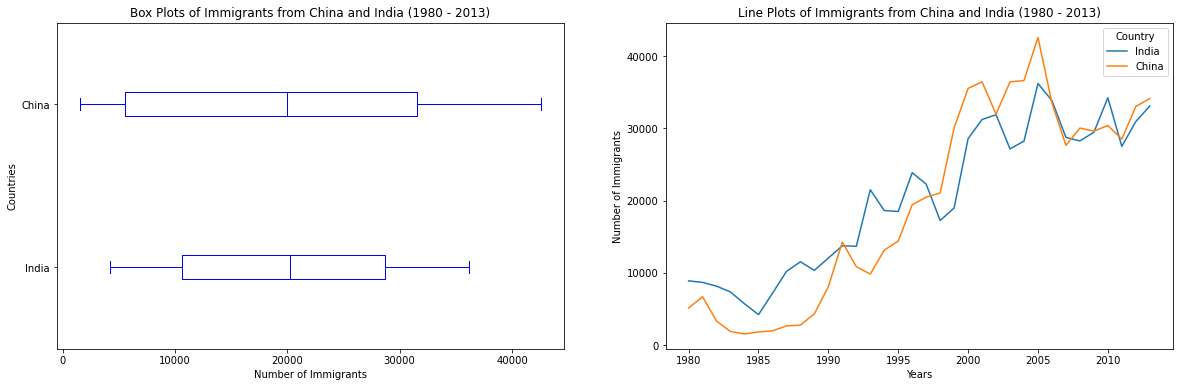

In [59]:
fig = plt.figure() 
ax0 = fig.add_subplot(1, 2, 1) 
ax1 = fig.add_subplot(1, 2, 2) 

# Subplot 1: Box plot
df_CI.plot(kind='box', color='blue', vert=False, figsize=(20, 6), ax=ax0) 
ax0.set_title('Box Plots of Immigrants from China and India (1980 - 2013)')
ax0.set_xlabel('Number of Immigrants')
ax0.set_ylabel('Countries') 

# Subplot 2: Line plot
df_CI.plot(kind='line', figsize=(20, 6), ax=ax1)
ax1.set_title ('Line Plots of Immigrants from China and India (1980 - 2013)')
ax1.set_ylabel('Number of Immigrants')
ax1.set_xlabel('Years')

plt.show()

## Question: 
Create a box plot to visualize the distribution of the top 15 countries
(based on total immigration) grouped by the decades 1980s, 1990s, and 2000s.

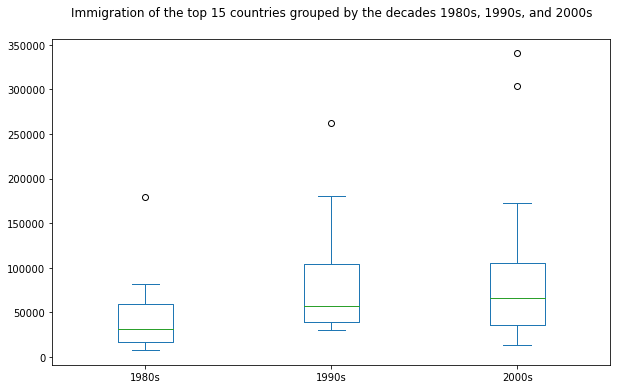

In [60]:
df_top15 = df_can.sort_values(['Total'], ascending = False, axis =0).head(15)

decade_1980s = list(map(str, range(1980,1990)))
decade_1990s = list(map(str, range(1990,2000)))
decade_2000s = list(map(str, range(2000,2010)))

df_1980s = df_top15.loc[: , decade_1980s].sum(axis=1)
df_1990s = df_top15.loc[: , decade_1990s].sum(axis=1)
df_2000s = df_top15.loc[: , decade_2000s].sum(axis=1)

df_3decades = pd.DataFrame({'1980s': df_1980s, '1990s': df_1990s, '2000s': df_2000s})

df_3decades.plot(kind='box', figsize=(10,6))

plt.title('Immigration of the top 15 countries grouped by the decades 1980s, 1990s, and 2000s', y=1.05)
plt.show()


# 4) Scatter Plot

In [61]:
df_tot = pd.DataFrame(df_can[years].sum(axis=0))
df_tot.index = map(int, df_tot.index)
df_tot.reset_index(inplace = True)
df_tot.columns = ['year', 'total']
df_tot.head()

,year,total
0,1980,99137
1,1981,110563
2,1982,104271
3,1983,75550
4,1984,73417


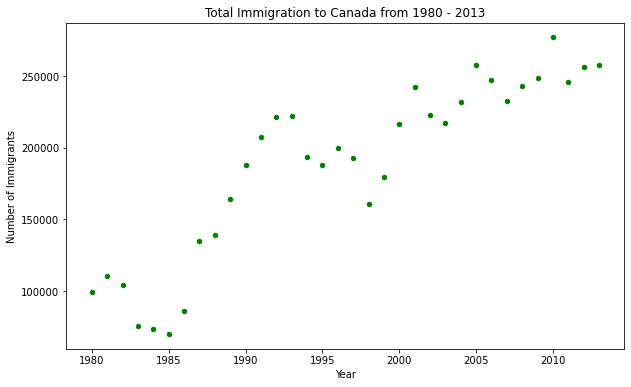

In [62]:
df_tot.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='green')
plt.title('Total Immigration to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.show()

### plot a linear line of best fit, and use it to predict the number of immigrants in 2015

In [63]:
x = df_tot['year'] 
y = df_tot['total'] 
fit = np.polyfit(x, y, deg=1)
fit

array([ 5.56709228e+03, -1.09261952e+07])

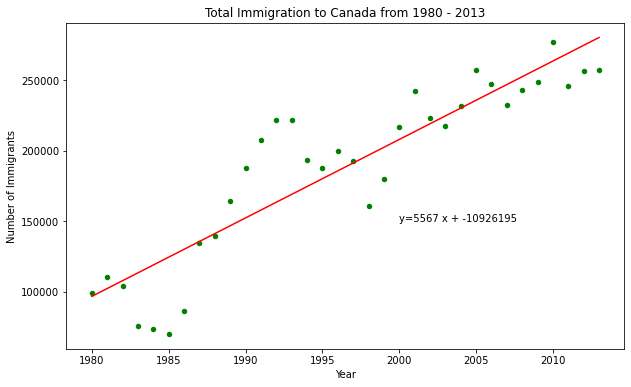

'No. Immigrants = 5567 * Year + -10926195'

In [64]:
df_tot.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='green')
plt.title('Total Immigration to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants') 
plt.plot(x, fit[0] * x + fit[1], color='red') 
plt.annotate('y={0:.0f} x + {1:.0f}'.format(fit[0], fit[1]), xy=(2000, 150000))
plt.show()

'No. Immigrants = {0:.0f} * Year + {1:.0f}'.format(fit[0], fit[1])

## Question: Create a scatter plot of the total immigration from Denmark, Norway, and Sweden to Canada from 1980 to 2013?

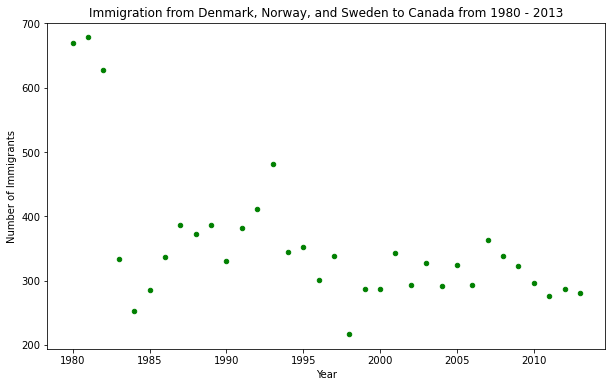

In [65]:
df_countries = df_can.loc[['Denmark', 'Norway', 'Sweden'], years]
df_countries = df_countries.transpose()

df_total = pd.DataFrame(df_countries.sum(axis=1))
df_total.reset_index(inplace=True)
df_total.columns=['year','total']
df_total['year']= df_total['year'].astype(int)

df_total.plot(kind='scatter',x='year',y='total', figsize=(10,6), color='green')
plt.title('Immigration from Denmark, Norway, and Sweden to Canada from 1980 - 2013')
plt.xlabel('Year')   
plt.ylabel('Number of Immigrants')

plt.show()

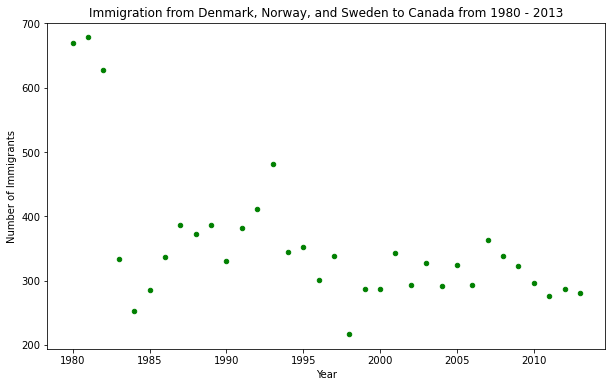

In [66]:
df_total.plot(kind='scatter',x='year',y='total', figsize=(10,6), color='green')
plt.title('Immigration from Denmark, Norway, and Sweden to Canada from 1980 - 2013')
plt.xlabel('Year')   
plt.ylabel('Number of Immigrants')

plt.show()

# 5) Bubble Plot

In [67]:
df_can_t = df_can[years].transpose()
df_can_t.index = map(int, df_can_t.index)

df_can_t.index.name = 'Year'
df_can_t.reset_index(inplace=True)

df_can_t.head()

Country,Year,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,...,United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Western Sahara,Yemen,Zambia,Zimbabwe
0,1980,16,1,80,0,0,1,0,368,0,...,9378,128,0,0,103,1191,0,1,11,72
1,1981,39,0,67,1,0,3,0,426,0,...,10030,132,0,0,117,1829,0,2,17,114
2,1982,39,0,71,0,0,6,0,626,0,...,9074,146,0,0,174,2162,0,1,11,102
3,1983,47,0,69,0,0,6,0,241,0,...,7100,105,0,0,124,3404,0,6,7,44
4,1984,71,0,63,0,0,4,42,237,0,...,6661,90,0,0,142,7583,0,0,16,32


In [68]:
norm_brazil = (df_can_t['Brazil'] - df_can_t['Brazil'].min()) / (df_can_t['Brazil'].max() - df_can_t['Brazil'].min())
norm_argentina = (df_can_t['Argentina'] - df_can_t['Argentina'].min()) / (df_can_t['Argentina'].max() - df_can_t['Argentina'].min())

In [69]:
norm_brazil = (df_can_t['Brazil'] - df_can_t['Brazil'].min()) / (df_can_t['Brazil'].max() - df_can_t['Brazil'].min())

# normalize Argentina data
norm_argentina = (df_can_t['Argentina'] - df_can_t['Argentina'].min()) / (df_can_t['Argentina'].max() - df_can_t['Argentina'].min())


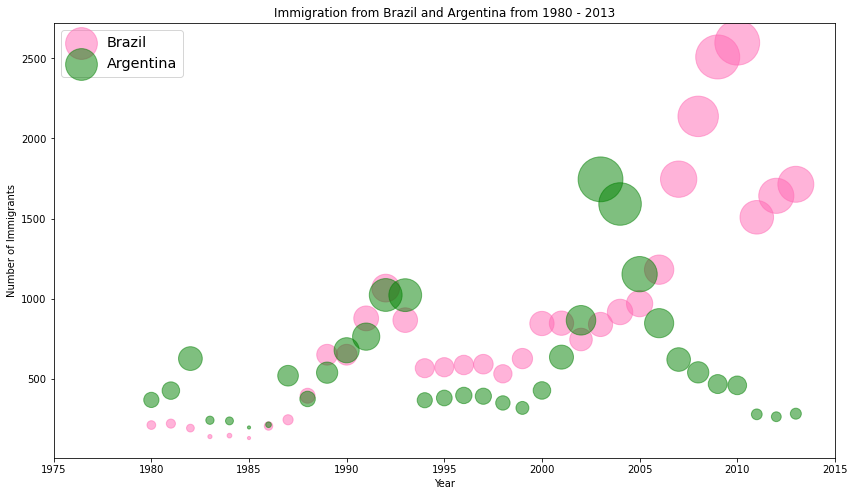

In [70]:
ax0 = df_can_t.plot(kind='scatter', 
                    x='Year', 
                    y='Brazil', 
                    figsize=(14, 8), 
                    alpha=0.5, 
                    color='hotpink', 
                    s= norm_brazil * 2000 + 10, 
                    xlim=(1975, 2015)
                   )
ax1 = df_can_t.plot(kind='scatter',
                    x='Year', 
                    y='Argentina', 
                    alpha=0.5, 
                    color="green", 
                    s= norm_argentina * 2000 + 10, 
                    ax = ax0 )
ax0.set_ylabel('Number of Immigrants')
ax0.set_title('Immigration from Brazil and Argentina from 1980 - 2013')
ax0.legend(['Brazil', 'Argentina'], loc='upper left', fontsize='x-large')

## Question:  Previously in this lab, we created box plots to compare immigration from China and India to Canada. Create bubble plots of immigration from China and India to visualize any differences with time from 1980 to 2013. You can use df can t that we defined and used in the previous example.

In [71]:
norm_china = (df_can_t['China'] - df_can_t['China'].min()) / (df_can_t['China'].max() - df_can_t['China'].min())
norm_india = (df_can_t['India'] - df_can_t['India'].min()) / (df_can_t['India'].max() - df_can_t['India'].min())

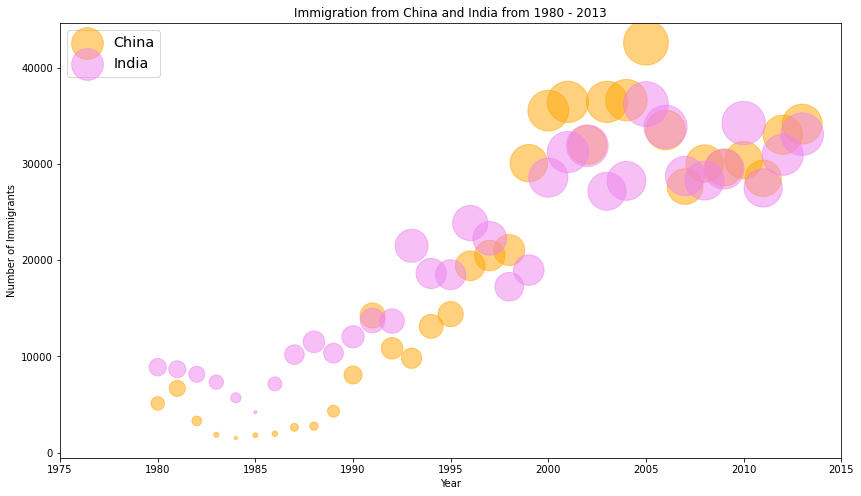

In [72]:
ax0 = df_can_t.plot(kind='scatter', 
                    x='Year', 
                    y='China', 
                    figsize=(14, 8), 
                    alpha=0.5, 
                    color='orange', 
                    s= norm_china * 2000 + 10, 
                    xlim=(1975, 2015)
                   )
ax1 = df_can_t.plot(kind='scatter',
                    x='Year', 
                    y='India', 
                    alpha=0.5, 
                    color="violet", 
                    s= norm_india * 2000 + 10, 
                    ax = ax0 )
ax0.set_ylabel('Number of Immigrants')
ax0.set_title('Immigration from China and India from 1980 - 2013')
ax0.legend(['China', 'India'], loc='upper left', fontsize='x-large')